# Midterm Examination

Due: October 30, 2024

Name: Eric Wu


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

sys.path.append('/content/drive/MyDrive/Colab Notebooks/CDS411')

Mounted at /content/drive


## Problem 1: Random Numbers

Generate 100,000 random integers between 0 and 100.  Verify that the percentage of prime numbers agrees with expectations.

In [ ]:
'''
# of primes between 0 to 100 is 25. so primes should be ~0.25*100000
'''

pi = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
print('Number of primes between 0 to 100 is', len(pi))
print('25 primes over 101 possible values is', round(25/101*100,3), '(expected value)')

randmatx = np.random.randint(0,100+1, 100000)

picnt = 0
for p in pi:
  picnt += (np.array((randmatx == p).nonzero()) == 1).size

print('The actual result was',picnt/100000*100)

Number of primes between 0 to 100 is 25
25 primes over 101 possible values is 24.752 (expected value)
The actual result was 24.684


In [ ]:
picnt = sum(map(lambda x : (np.array((randmatx == p).nonzero()) == 1).size, pi))
print(picnt/100000*100)

24.725


## Problem 2: Monte Carlo

Consider a sphere of radius r = 1 contained within a bounding cube.  Using Monte Carlo methods, predict the value of pi.  Create a lin-log plot of the predicted value of pi as a function of Monte Carlo trial.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def fPI():
  '''
  Finds pi using a Monte Carlo trial of a sphere bounded by a cube
  output: inside
  '''
  randxyz = np.random.ranf((1,3))*2-1 #initiate n x,y vectors
  inside = sum((randxyz**2).sum(1) < 1) # calculate if a x,y,z set is inside the sphere
  return inside

def llGraph(n):
  '''
  Graphs prediction of pi using the fPI function
  input: n (int) iterations
  output: lin log graph of predicted pi
  '''
  inside = int(); pi = [0]

  for i in range(1, n+1):
    inside += fPI()
    pi.append(inside*6/i)

  plt.xscale('log');plt.grid(True)
  plt.plot([i for i in range(0,n+1)], pi); plt.title('Pi as a function of Monte Carlo trial');plt.show()

  print(pi[-1])

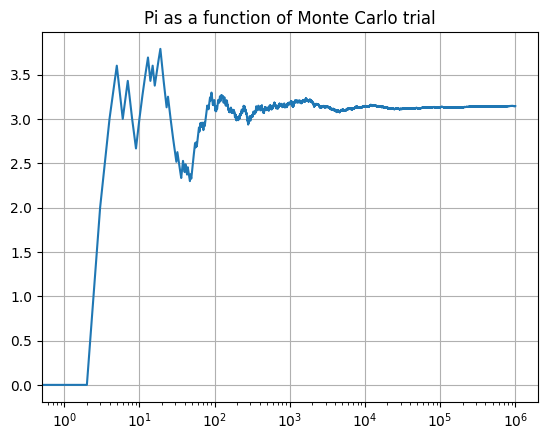

3.144198


In [9]:
llGraph(1000000)

## Problem 3: Schelling Model

Intialize a Schelling model involving four animal types of equal number in a 100 x 100 grid, with 5 % empty cells.  Display the initial grid.  Perform 500,000 iterations and display the grid every 100,000 iterations.


In [ ]:
import imageio
import schelling as sch

In [ ]:
def Init4(V,H,pctempty):
    grid=np.zeros((V,H),int)
    # populate
    t1 = pctempty # first threshold
    step = (1-t1)/4
    t2 = t1+step
    t3 = t2 + step
    t4 = t3 + step
    r = np.random.rand(V,H)
    mask1 = (r>t1)*(r<=t2)
    mask2 = (r>t2)*(r<=t3)
    mask3 = (r>t3)*(r<=t4)
    mask4 = (r>t4)
    print(step,t1,t2,t3,t4)
    grid = grid + mask1 + mask2*2 + mask3*3 + mask4*4
    return grid

def Go4():
  #Initialize
  grid = Init4(100,100,0.05)

  #Display initial grid
  plt.imshow(grid)
  plt.title('Initial')
  plt.show()

  for i in range(5):
    for j in range(100000):
      sch.Iterate(grid)
      if (j+1)%10000 == 0:
        print((j+1)/100000*100)
    plt.imshow(grid)
    plt.title(f'Grid after {(i+1)*100000} iterations')
    plt.show()


0.2375 0.05 0.2875 0.5249999999999999 0.7625


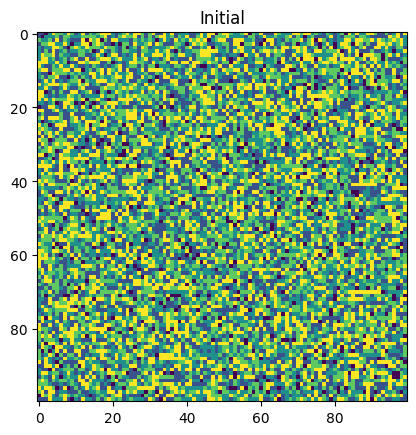

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


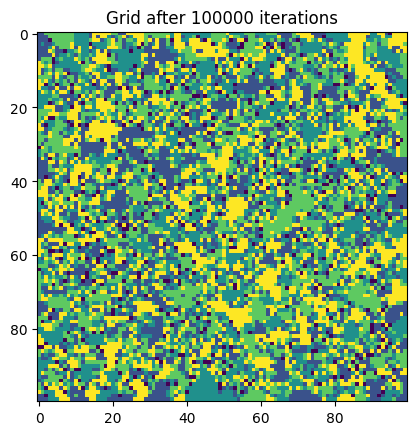

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


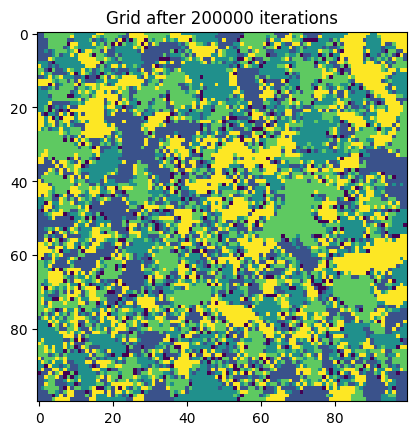

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


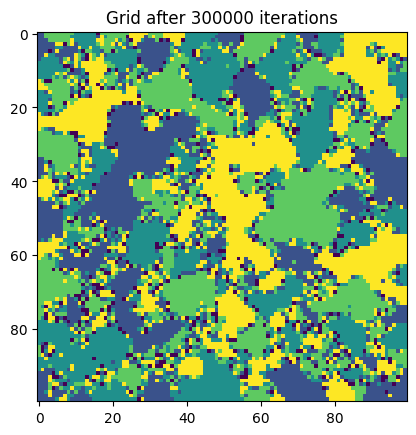

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


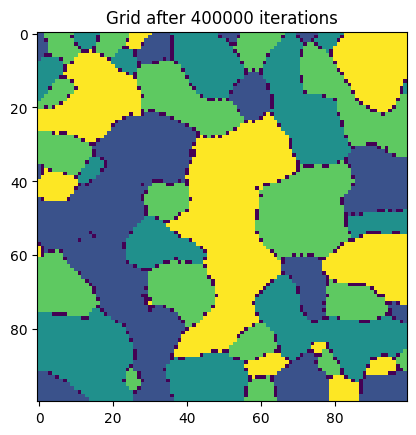

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


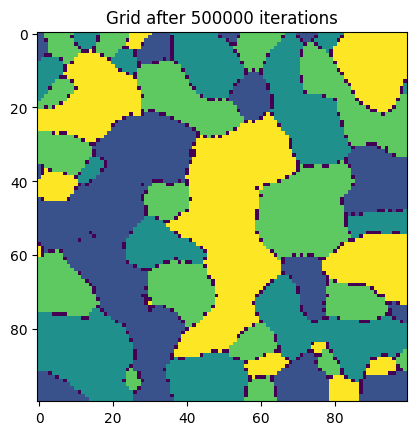

In [ ]:
%matplotlib inline

Go4()

## Problem 4: Hidden Markov Models

Create a Hidden Markov model considering eight-letter combinations and produce a unique Shakespearean passage of 200 words.  Repeat this five times and present your favorite passage.

In [ ]:
import shakespeare

In [ ]:
sonnets = shakespeare.Read('/content/drive/MyDrive/Colab Notebooks/CDS411/sonnets.txt')
d8 = shakespeare.MakeDict(sonnets,8)

strList = list()
for i in range(5):
  strList.append(shakespeare.BuildString(d8,200,'eyiou',8))

In [ ]:
print(strList[0])

 statues overturn,
and needy nothing worth.

that you alone,
then lack'd i matter; that enfeebled mine.

farewell! thou art, therefore from myself with this rage shall be thy lovely and more temperate:
rough 


## Problem 5: Connected Graphs

What is the shortest path between the two actors _James Debbouze_ and _Louis Armstrong_?  Include the names of the actors along this path and the movies that connect them.


In [ ]:
import bacon, floyd
import movies3 as mov
f1 = '/content/drive/MyDrive/Colab Notebooks/CDS411/movies1100.xlsx'
movies, actors, isin = mov.ReadData(f1)

In [ ]:
def MakeG( isin ):
  '''
  Fixed func MakeG as the MakeG in bacon.py bases the size of G on the entries of isin, which does not take in account all of the aids in set(aid)
  input: isin df
  return: initialized G matrix
  '''
  ## list of unique aids + sort
  mat = np.array( isin )
  t = mat[:,2]+0
  aids = np.array(list(set(t)))
  ## allocate G
  #N = len(aids)
  N = 856 #It seems only 854 actors are actually connected, but the connected actors' aids go up to 856
  G = np.zeros((N+1,N+1))
  ## for each actor
  for i in aids:
    ## get mids
    mids = mov.MidsFromAid(isin, i)
    ## aids from actor's movies
    aids2 = mov.AidsFromMids( isin, mids )
    # populate G
    if i==771:
      print(aids2)
    for a in aids2:
        G[i-1, a-1] = 1
    ## return G
  print(G[770,770])
  return G

In [ ]:
G = MakeG(isin) #Initialize G
G,P = bacon.RunFloyd(G) #Fill in and correct G and create P

[640, 121, 770, 771, 334, 849, 182, 729, 221]
1.0
0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 

In [ ]:
def Fpath(name1,name2,distance=True,find=True,actrs=actors,p=P,g=G):
  '''
  Finds the path from actor1 to actor2 and returns path
  input: Actor1 (string), Actor2 (string), Distance flag for printing distance between actor1 and actor2, find flag for printing the path, pass in actors df, P matx, and G matx
  return: path (list) between actor1 and actor2
  '''
  f1,l1 = name1.split()
  f2,l2 = name2.split()
  aid1 = mov.AidFromName(actors,f1,l1)
  aid2 = mov.AidFromName(actors,f2,l2)
  v,h = aid1-1,aid2-1

  if G[v,h] >= 9999:
    print('The actors are not connected.')
    print(f"Distance is {G[v,h]}")
    return

  if distance:
    print(f"Distance is {G[v,h]}")

  path = floyd.FindPath(P,v,h)
  if find:
    print(f'Path {path}')

  return path

In [ ]:
def MoviesOfTwoActors(actors,isin,aid1, aid2):
  '''
  Gets the movies shared between two actors in form of mid
  inputs: actors df, isin df, aid1, aid2
  output: mids of the shared movies between actors
  '''

  mids1 = mov.MidsFromAid(isin,aid1)
  mids2 = mov.MidsFromAid(isin,aid2)
  mids = mov.CombineLists(mids1,mids2)
  return mids

In [ ]:
aids = np.array(Fpath('Jamel Debbouze','Louis Armstrong',True,False))+1 #Get path of aids between actors
print('Actors',mov.NamesFromAids(actors,aids))

mids = list() #Initialize mid list
for i in range(6):
  mids.append(MoviesOfTwoActors(actors,isin,aids[i],aids[i+1])) #Loop N-1, appends the mid shared between two actors to mids list

print('Movies',mov.TitlesFromMids(movies,mids)) #Print out titles from the list of mids'''

Distance is 6.0
Actors [('Jamel', 'Debbouze'), ('Audrey', 'Tautou'), ('Jodie', 'Foster'), ('John', 'Malkovich'), ('Tom', 'Hanks'), ('Harry', 'Morgan'), ('Louis', 'Armstrong')]
Movies ['Amélie', 'A Very Long Engagement', 'Shadows and Fog', 'The Great Buck Howard', 'Dragnet', 'The Glenn Miller Story']
